
<p><b>Report #6, 27-05-2020</p></b>


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import itertools
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
# %matplotlib notebook
# %%html

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_columns', None)



<p><b>1- Lets have look at the dataset:</p></b>
<P> - text fields before prepocessing: {essay0, essay1, essay2, essay7, essay8, essay9}</p>

<P> - text field after preprocessing: {clean_text}</p>
<p>&nbsp; &nbsp; In the preprocessing phase all the essays are merged for each user and useless information is omitted from the text.</p>
<P> - target field: {isced}</p>
<P> - shape of dataset: (49924, 20)</p>
<p>&nbsp; &nbsp; It means that the dataset consists of 49924 rows(user) and 20 columns(features for each user) after removing all the null values.</p>

        

In [2]:
okcupid_df = pd.read_csv('../../data/processed/preprocessed_cupid.csv')
okcupid_df.dropna(subset=['isced', 'text', 'clean_text'], inplace=True)
print('A small sample of OkCupid dataset:')
okcupid_df.head(3)

A small sample of OkCupid dataset:


,age,education,essay0,essay1,essay2,essay3,essay7,essay8,essay9,sex,text,isced,isced2,words,#words,sentences,#sentences,#anwps,removed_punctuation,clean_text
0,22,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,m,about me:i would love to think that i was some...,3.0,Upper secondary education,"['about', 'me', ':', 'i', 'would', 'love', 'to...",405,['about me:i would love to think that i was so...,27,15.00,about mei would love to think that i was some ...,mei love think kind intellectualeither dumbest...
2,38,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",m,"i'm not ashamed of much, but writing public te...",7.0,Master or equivalent,"['i', ""'m"", 'not', 'ashamed', 'of', 'much', ',...",558,"[""i'm not ashamed of much, but writing public ...",31,18.00,im not ashamed of much but writing public text...,im ashamed writing public text onlinedating si...
3,23,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,NaN,NaN,you feel so inclined.,m,i work in a library and go to school. . . read...,3.0,Upper secondary education,"['i', 'work', 'in', 'a', 'library', 'and', 'go...",43,"['i work in a library and go to school.', '.',...",4,10.75,i work in a library and go to school reading...,work library school reading things written old...



<p><b>2- Using LIWC(Linguistic Inquiry and Word Count)</p></b>

<p> &nbsp; &nbsp;- LIWC is a transparent text analysis program that counts words in psychologically meaningful categories.</p>
<p> &nbsp; &nbsp;- Table 1 provides a list of the default LIWC2015 dictionary categories, scales, sample scale words, and relevant scale word counts.</p>
<img src="images/img1.jpg">
<img src="images/img2.jpg">
<img src="images/img3.jpg">
<a href="https://repositories.lib.utexas.edu/bitstream/handle/2152/31333/LIWC2015_LanguageManual.pdf">Link to the manual</a>
<p>- The LIWC package relies on internal default dictionaries that define which words should be counted in which target category. we are using LIWC2015 v1.6.</p>
<p>- LIWC receives our dataset in the csv format and goes through each rows of dataset word by word. Each word would be compared with the dictionary file(LIWC2015) and the associated categories would be distinguished. After going through all the words in the text , LIWC would calculate the percentage of each LIWC category. So, for example, we might discover that 2.34% of all the words in a given text are impersonal pronouns and 3.33% are auxiliary verbs. 
</p>


In [3]:
liwc_df = pd.read_csv('../../data/liwc-data/liwic_cupid_v0.csv', dtype=object, low_memory = False)

# Some preprations on data
# Rename first three columns
liwc_df.rename(columns={'A':'pre_index', 'B':'text', 'C':'isced'}, inplace=True)
# skip first row (header) and first two columns
liwc_df = liwc_df.iloc[1:, 2:]
# print(liwc_df.columns)

# change type to float
liwc_df.replace(',','.',inplace=True,  regex=True)
liwc_df = liwc_df.astype(float)

liwc_df['isced'].mask(liwc_df['isced'].isin([3.0, 5.0, 1.0]) , 0.0, inplace=True)
liwc_df['isced'].mask(liwc_df['isced'].isin([6.0, 7.0, 8.0]) , 1.0, inplace=True)

data = liwc_df.iloc[:, 1:]
target = liwc_df.iloc[:, 0].astype(float)
print('A small sample of dataset with LIWC outputs:')
liwc_df.head(10)

A small sample of dataset with LIWC outputs:


,isced,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,0.0,359.0,83.13,55.53,40.11,94.26,12.82,17.55,83.29,48.47,12.81,10.58,6.41,0.28,3.90,0.00,0.00,2.23,5.85,15.60,6.69,2.79,5.57,1.11,13.93,7.24,3.06,0.00,1.11,2.23,7.80,5.85,1.39,0.00,0.56,0.00,9.19,0.00,0.84,0.00,0.56,14.21,3.34,1.11,2.51,4.46,0.56,3.90,2.79,1.11,0.84,0.56,4.74,1.95,1.11,0.00,0.56,7.24,3.06,2.79,0.28,1.95,0.00,1.11,10.58,0.00,8.36,0.56,5.29,2.51,2.23,1.95,0.56,0.56,0.00,0.00,0.84,0.56,0.00,0.28,0.00,0.0,16.43,10.03,3.34,0.84,0.00,0.00,0.28,0.00,0.00,0.84,1.11,0.00
2,1.0,462.0,63.78,42.28,77.54,70.57,14.90,30.52,82.03,46.10,13.64,8.44,6.49,0.00,1.30,0.00,0.65,5.19,3.25,14.50,6.49,4.11,8.66,0.87,14.50,7.58,4.76,1.30,1.08,3.46,7.58,4.98,2.60,0.87,0.87,0.00,8.44,0.00,0.87,0.00,0.00,15.80,3.03,1.52,1.52,7.14,1.08,4.33,3.68,1.73,1.30,0.43,1.73,0.87,0.43,0.22,0.22,5.63,2.81,1.08,1.08,0.22,0.43,1.30,9.09,0.65,13.20,2.81,6.49,4.11,1.52,1.95,0.22,0.22,0.22,0.22,0.22,0.00,0.00,0.22,0.00,0.0,22.29,7.36,8.87,0.00,0.00,0.00,0.00,0.43,0.87,3.03,1.73,0.00
3,0.0,39.0,71.92,60.13,46.75,73.64,19.50,33.33,87.18,41.03,12.82,10.26,7.69,0.00,2.56,0.00,0.00,2.56,5.13,10.26,2.56,2.56,10.26,0.00,17.95,2.56,2.56,0.00,0.00,0.00,7.69,5.13,2.56,2.56,0.00,0.00,10.26,0.00,0.00,0.00,0.00,5.13,2.56,0.00,0.00,0.00,0.00,2.56,2.56,0.00,0.00,2.56,0.00,0.00,0.00,0.00,0.00,10.26,2.56,5.13,5.13,2.56,0.00,2.56,10.26,0.00,7.69,2.56,2.56,2.56,20.51,5.13,0.00,0.00,0.00,2.56,0.00,0.00,0.00,0.00,0.00,0.0,10.26,10.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.0,65.0,93.26,43.89,63.54,99.00,10.83,20.00,76.92,30.77,9.23,7.69,7.69,0.00,0.00,0.00,0.00,1.54,4.62,12.31,1.54,3.08,3.08,0.00,13.85,6.15,1.54,1.54,0.00,3.08,9.23,9.23,0.00,0.00,0.00,0.00,6.15,1.54,0.00,0.00,0.00,10.77,3.08,3.08,0.00,4.62,0.00,0.00,7.69,6.15,0.00,1.54,0.00,0.00,0.00,0.00,0.00,9.23,1.54,7.69,0.00,0.00,0.00,0.00,16.92,3.08,12.31,1.54,6.15,4.62,6.15,4.62,0.00,1.54,0.00,0.00,4.62,0.00,3.08,0.00,0.00,0.0,29.23,12.31,3.08,1.54,0.00,1.54,0.00,0.00,0.00,3.08,0.00,7.69
5,1.0,252.0,28.34,22.55,96.82,99.00,10.08,20.24,86.90,48.81,19.84,14.68,13.89,0.00,0.40,0.00,0.40,5.16,2.78,11.11,10.32,4.37,7.14,1.19,20.63,5.56,1.98,2.78,0.40,1.59,12.30,9.92,2.38,0.00,0.79,0.40,10.32,0.00,0.40,0.00,0.00,15.87,6.75,1.98,0.79,5.56,0.79,1.98,5.56,1.59,3.17,0.79,3.17,2.38,0.40,0.00,0.00,6.35,1.59,0.79,1.19,1.59,1.19,2.38,15.08,0.40,10.32,0.40,7.14,2.78,1.59,1.59,0.00,0.79,0.00,0.00,2.38,1.19,0.00,1.19,0.00,0.0,23.02,11.90,1.98,0.40,0.79,0.00,0.40,0.40,0.00,5.56,1.59,0.00
6,1.0,96.0,93.26,58.24,29.15,99.00,13.71,16.67,85.42,48.96,13.54,8.33,6.25,1.04,0.00,0.00,1.04,5.21,8.33,17.71,7.29,2.08,3.12,0.00,10.42,5.21,2.08,0.00,1.04,3.12,13.54,11.46,2.08,0.00,1.04,1.04,7.29,0.00,0.00,0.00,0.00,4.17,1.04,0.00,2.08,2.08,0.00,0.00,3.12,1.04,1.04,1.04,4.17,1.04,2.08,0.00,0.00,9.38,4.17,0.00,4.17,1.04,0.00,0.00,11.46,0.00,12.50,0.00,9.38,3.12,0.00,2.08,0.00,1.04,0.00,1.04,0.00,0.00,0.00,0.00,0.00,0.0,8.33,6.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.08,0.00,0.00
7,1.0,66.0,94.55,61.92,85.21,94.75,13.20,34.85,86.36,39.39,3.03,3.03,3.03,0.00,0.00,0.00,0.00,0.00,7.58,15.15,4.55,4.55,9.09,0.00,12.12,4.55,0.00,0.00,0.00,0.00,4.55,4.55,0.00,0.00,0.00,0.00,10.61,0.00,1.52,0.00,0.00,7.58,3.03,0.00,1.52,3.03,0.00,4.55,0.00,0.00,0.00,0.00,1.52,1.52,0.00,0.00,0.00,7.58,3.03,1.52,1.52,1.52,0.00,1.52,3.03,1.52,18.18,4.55,9.09,4.55,9.09,6.06,1.52,4.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,24.24,6.06,12.12,0.00,0.00,0.00,0

<p> - LIWC is applied to the 'text' column in the original dataset before preprocessing.</p>
<p> - shape of LIWC out put is (49943, 94)</p>
<p> &nbsp; &nbsp; It means that there are 49943 rows in the dataset and for each row we have extracted 94 features from the text</p>

<p> - List of all the columns in LIWC output:</p>
<p> ['isced', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you',
       'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb',
       'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number',
       'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social',
       'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear',
       'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives',
       'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast',
       'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time',
       'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal',
       'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period',
       'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote',
       'Apostro', 'Parenth', 'OtherP']</p>
<p> - isced : </p>
<p> &nbsp; &nbsp; 0.0 -> primary educated</p>
<p> &nbsp; &nbsp; 1.0 -> high educated</p>
<p> - Most LIWC2015 output variables are expressed as percentage of total words.
There are six exceptions: word count (WC; raw word count), (WPS; mean words per sentence), and four summary variables: Analytic, Clout, Authentic, and Tone. </p>
<p> - LIWC2015 converts all the text to lower case before processing.</p>
<p> - LIWC2015 can only count words that are in its dictionaries. Misspellings, colloquialisms, foreign words, and abbreviations are usually not in the internal dictionaries.</p>
<p> - The Words per sentence (WPS) category is based on the number of times that end-of-sentence markers are detected. These include all periods (.), question marks, and exclamation points. </p>
<p> - Many types of “netspeak” that is used as shorthand interpersonal communication (e.g., “lol”, “4ever”) are captured by the LIWC2015 dictionary.</p>



### The sumary statistics of quantitative variables


In [4]:
data.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000,49943.000000
mean,242.447130,60.966416,39.086872,74.928159,86.806447,17.419650,20.864358,85.124978,48.126253,14.367450,10.514706,8.351433,0.229758,1.586747,0.102610,0.244067,3.831024,5.542928,12.615920,7.646076,4.350556,6.853854,1.217015,16.157234,5.379418,1.917340,1.100911,0.899406,1.927801,8.192788,6.915421,1.166295,0.207655,0.311893,0.165093,8.179453,0.258263,0.844881,0.291726,0.355760,11.024124,2.185730,1.154584,1.377921,3.796447,1.126967,3.289988,2.968931,1.215415,1.012290,0.480899,3.557822,0.669730,0.886542,0.213773,1.287393,7.824119,2.862718,1.860953,1.636169,1.782328,0.225519,1.513886,11.014931,1.019361,13.783740,2.310528,7.121168,4.599466,2.995507,4.059573,0.490418,0.515923,0.149838,0.050157,1.131250,0.179032,0.500092,0.202746,0.206621,0.032830,26.675737,9.936590,6.498133,0.227411,0.243557,0.270879,0.706208,1.051219,0.360582,2.958832,1.054268,3.367700
std,194.491032,20.685397,19.140740,21.389092,21.225339,11.496763,5.775493,5.563295,6.331289,4.118507,3.405424,3.162640,0.496011,1.649766,0.384719,0.460163,2.195409,2.280062,3.280701,2.771197,2.286617,2.322356,1.241006,4.058161,2.602901,1.425264,0.991772,1.092969,1.340164,3.811895,3.748562,1.262225,0.437787,0.671368,0.431042,3.644888,0.573049,1.070593,0.630993,0.781624,3.841563,1.580188,1.089670,1.347626,2.074074,1.248280,1.889372,2.216492,1.486272,1.343192,0.766061,2.576706,1.131791,1.063383,0.769288,1.688402,3.219083,2.117071,1.770190,1.415377,1.404184,0.462191,1.388347,3.574369,1.433919,4.527172,1.789007,2.919676,2.417566,2.675638,3.228865,0.751313,0.934103,0.410245,0.257406,1.846991,0.589261,1.390538,0.539335,0.448180,0.582825,562.716131,28.513867,5.425424,1.884723,1.569667,1.925316,2.454776,2.471626,0.859012,2.242414,4.605569,561.866578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

<p><b> 3- Training Logistic regression based on LIWC output without including text.<p><b>

### Grid search settings for Logistic regression

<img src="images/img5.jpg">


Final Accuracy for Logistic: 0.6910838227442605
Confusion matrix, without normalization
[[1303  741]
 [2152 5169]]
              precision    recall  f1-score   support

         0.0       0.38      0.64      0.47      2044
         1.0       0.87      0.71      0.78      7321

    accuracy                           0.69      9365
   macro avg       0.63      0.67      0.63      9365
weighted avg       0.77      0.69      0.71      9365



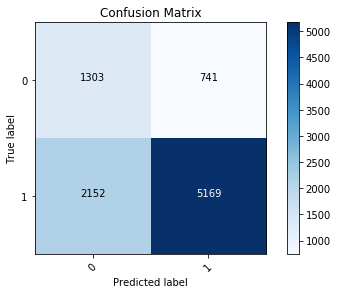

In [5]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:    
        print('Confusion matrix, without normalization')
         
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Train dataset

X_train,X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled.mean(axis=0)
# X_train_scaled.std(axis=0)

LogisticRegr = LogisticRegression(random_state=0, max_iter=10000, solver='lbfgs', penalty='l2', class_weight='balanced')
LogisticRegr.fit(X_train_scaled, y_train)
X_val_scaler = scaler.transform(X_val)
predictions = LogisticRegr.predict(X_val_scaler)





print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val,predictions)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1], normalize=False,
                      title='Confusion Matrix')
print(classification_report(y_val, predictions))


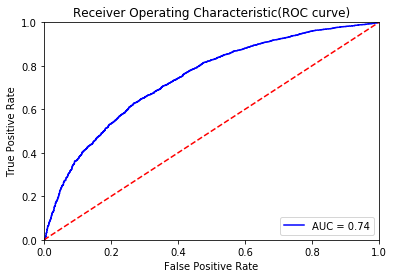

In [6]:
# calculate the fpr and tpr for all thresholds of the classification
probs = LogisticRegr.predict_proba(X_val_scaler)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic(ROC curve)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<b>Logistic regression with Cross Validation:</b>

In [34]:
# Logistic regression with Cross Validation
print('# Logistic regression with 5-Fold Cross Validation:')
LogisticRegr_cross = LogisticRegression(random_state=0, max_iter=10000, solver='lbfgs', penalty='l2', class_weight='balanced')
LogisticRegr_cross.fit(X_train_scaled, y_train)

data_scaler = scaler.transform(data)


scores = cross_val_score(LogisticRegr_cross, data_scaler, target, cv=5)
print(scores)
print(scores.mean())


y_pred = cross_val_predict(LogisticRegr_cross, X_val_scaler, y_val, cv=5)
conf_mat = confusion_matrix(y_val, y_pred)
print(conf_mat)

[0.6903594  0.70347382 0.70517569 0.69213056 0.68892671]
0.6960132357046496
[[1109  613]
 [1847 4422]]


<p><b> 5- Logistic regression feature coefficient values</b></p>

Feature: 0, Score: 0.04600
Feature: 1, Score: 0.21037
Feature: 2, Score: 0.22250
Feature: 3, Score: 0.08831
Feature: 4, Score: 0.05770
Feature: 5, Score: -0.10393
Feature: 6, Score: 0.22332
Feature: 7, Score: 0.05449
Feature: 8, Score: 0.52522
Feature: 9, Score: 0.23312
Feature: 10, Score: -0.29673
Feature: 11, Score: -0.23127
Feature: 12, Score: -0.01180
Feature: 13, Score: -0.07721
Feature: 14, Score: 0.09561
Feature: 15, Score: -0.01828
Feature: 16, Score: -0.22294
Feature: 17, Score: -0.05989
Feature: 18, Score: -0.32468
Feature: 19, Score: -0.14734
Feature: 20, Score: -0.08410
Feature: 21, Score: -0.08061
Feature: 22, Score: -0.04734
Feature: 23, Score: -0.19266
Feature: 24, Score: 0.06339
Feature: 25, Score: 0.01209
Feature: 26, Score: 0.07330
Feature: 27, Score: -0.05691
Feature: 28, Score: 0.01764
Feature: 29, Score: -0.44681
Feature: 30, Score: 0.59295
Feature: 31, Score: 0.11774
Feature: 32, Score: -0.06084
Feature: 33, Score: -0.02102
Feature: 34, Score: -0.02905
Feature: 35

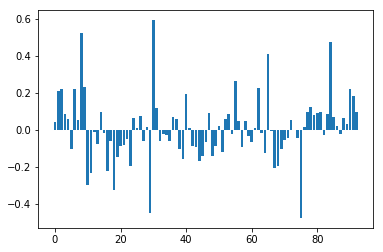

In [6]:
# Most Important features
import matplotlib.pyplot as plt

importance = LogisticRegr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [9]:
col_no_pos =[]
col_no_neg =[]
for i,v in enumerate(importance):
    if v>0.3:
        col_no_pos. append(i)
        print('Feature: %0d, Score: %.5f' % (i,v))
    elif v< -0.3:
        col_no_neg. append(i)
#         print('Feature: %0d, Score: %.5f' % (i,v))
        
    
print("positive:",col_no_pos)
print("negetive",col_no_neg)

Feature: 8, Score: 0.52522
Feature: 30, Score: 0.59295
Feature: 65, Score: 0.41068
Feature: 84, Score: 0.47631
positive: [8, 30, 65, 84]
negetive [18, 29, 75]


<b> features with |coefficient| >0.2: </b>

In [8]:
cols_name = data.columns

# liwc_df['isced'] = liwc_df['isced'].astype(float)
# liwc_df['isced'].mask(liwc_df['isced'].isin([3, 5.0, 1.0]) , 0 , inplace=True) # 0 for primary education
# liwc_df['isced'].mask(liwc_df['isced'].isin([6.0, 7.0, 8.0]) , 1 , inplace=True) # 1 for high education

cols_no_pos = [1, 2, 6, 8, 9, 30, 55, 62, 65, 84, 90]
cols_no_neg = [10, 11, 16, 18, 29, 67, 75]
imp_cols_pos = []
imp_cols_neg =[]
for i in cols_no_pos:
    imp_cols_pos.append( cols_name[i])
for i in cols_no_neg:
    imp_cols_neg.append(cols_name[i])
print('list of features that are more involved in predicting class 0:', imp_cols_neg)
print('list of features that are more involved in predicting class 1:', imp_cols_pos)

list of features that are more involved in predicting class 0: ['ppron', 'i', 'ipron', 'prep', 'affect', 'space', 'informal']
list of features that are more involved in predicting class 1: ['Analytic', 'Clout', 'Sixltr', 'function', 'pronoun', 'posemo', 'ingest', 'focuspast', 'relativ', 'Colon', 'Apostro']


| Abbrev | Category   |Examples|
|------|------|-----|
|ppron|Personal pronouns|I, them, her|
|i|1st pers singular|I, me, mine|
|ipron|Impersonal pronouns|it, it’s, those|
|   prep  | Prepositions|to, with, above|
|affect|Affective processes|happy, cried|
|space|space|down, in, thin|
|informal|Informal language|

| Abbrev | Category   |Examples|
|------|------|-----|
|Analytic|Analytical thinking|
|Clout|Clout|
|Sixltr|Words > 6 letters|
|function|Total function words|it, to, no, very|
|posemo|Positive emotion|love, nice, sweet|
|pronoun|Total pronouns|I, them, itself|
|ingest|Ingestion|dish, eat, pizza|
|focuspast|Past focus|ago, did, talked|
|relativ|Relativity|area, bend, exit|
|Apostro||
|Colon||


<P><b>6- training logistic regression considering both clean_text and LIWC features:</p></b>

In [13]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

df_merge = pd.read_csv('D:\projects\okcupid\data\liwc-data/liwic_cupid.csv', dtype=object, low_memory = False)
df_merge.rename(columns={'A':'pre_index', 'B':'text', 'C':'isced', 'D':'clean_text'}, inplace=True)
df_merge = df_merge.iloc[1:, :]

df_merge = df_merge.iloc[ : , 2: ]

df_merge.replace(',','.',inplace=True,  regex=True)
df_merge.iloc[:, 2: ] = df_merge.iloc[ : , 2: ].astype(float)
df_merge['clean_text'] = df_merge['clean_text'].astype(str)
df_merge['isced'] = df_merge['isced'].astype(float)
df_merge['isced'].mask(df_merge['isced'].isin([3, 5.0, 1.0]) , 0 , inplace=True) # 0 for primary education
df_merge['isced'].mask(df_merge['isced'].isin([6.0, 7.0, 8.0]) , 1 , inplace=True) # 1 for high education
# df['isced'] = df['isced'].astype(int)
df_merge.head(2)

,isced,clean_text,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,0.0,mei love think kind intellectualeither dumbest...,359,83.13,55.53,40.11,94.26,12.82,17.55,83.29,48.47,12.81,10.58,6.41,0.28,3.9,0,0,2.23,5.85,15.6,6.69,2.79,5.57,1.11,13.93,7.24,3.06,0,1.11,2.23,7.8,5.85,1.39,0,0.56,0,9.19,0,0.84,0,0.56,14.21,3.34,1.11,2.51,4.46,0.56,3.9,2.79,1.11,0.84,0.56,4.74,1.95,1.11,0,0.56,7.24,3.06,2.79,0.28,1.95,0,1.11,10.58,0,8.36,0.56,5.29,2.51,2.23,1.95,0.56,0.56,0,0,0.84,0.56,0,0.28,0,0,16.43,10.03,3.34,0.84,0,0,0.28,0,0,0.84,1.11,0
2,1.0,im ashamed writing public text onlinedating si...,462,63.78,42.28,77.54,70.57,14.9,30.52,82.03,46.1,13.64,8.44,6.49,0,1.3,0,0.65,5.19,3.25,14.5,6.49,4.11,8.66,0.87,14.5,7.58,4.76,1.3,1.08,3.46,7.58,4.98,2.6,0.87,0.87,0,8.44,0,0.87,0,0,15.8,3.03,1.52,1.52,7.14,1.08,4.33,3.68,1.73,1.3,0.43,1.73,0.87,0.43,0.22,0.22,5.63,2.81,1.08,1.08,0.22,0.43,1.3,9.09,0.65,13.2,2.81,6.49,4.11,1.52,1.95,0.22,0.22,0.22,0.22,0.22,0,0,0.22,0,0,22.29,7.36,8.87,0,0,0,0,0.43,0.87,3.03,1.73,0


In [55]:
data = df_merge.iloc[:, 1:]
target = df_merge.iloc[:, 0].astype(float)

# vectorization
X_t, X_test, y_t, y_test = train_test_split(data, target, train_size=0.75, stratify=target, test_size=0.25, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, train_size=0.75, stratify=y_t, test_size=0.25, random_state = 0) 


In [56]:
cols = X_train.columns
cols = cols[1:]
cols
get_text_data = FunctionTransformer(lambda x: x['clean_text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[cols], validate=False)

In [57]:
# merge vectorized text data and scaled numeric data
process_and_join_features = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('scaler', preprocessing.StandardScaler())
                
            ])),
             ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vec', CountVectorizer(binary=False, ngram_range=(1, 2), lowercase=True))
            ]))
         ])),
    ('clf', LogisticRegression(random_state=0,max_iter=5000, solver='sag', penalty='l2', class_weight='balanced'))
])

# 
process_and_join_features.fit(X_train, y_train)
predictions = process_and_join_features.predict(X_val)


print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val,predictions)
# plt.figure()
# plot_confusion_matrix(cm, classes=[0,1], normalize=False,
#                       title='Confusion Matrix')

print(classification_report(y_val, predictions))

Final Accuracy for Logistic: 0.8298985584623598
              precision    recall  f1-score   support

         0.0       0.61      0.62      0.62      2060
         1.0       0.89      0.89      0.89      7305

    accuracy                           0.83      9365
   macro avg       0.75      0.76      0.75      9365
weighted avg       0.83      0.83      0.83      9365



Confusion matrix, without normalization
[[1287  773]
 [ 820 6485]]


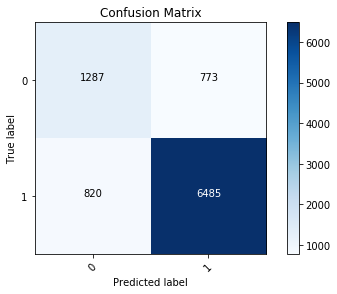

In [61]:
plt.figure()
plot_confusion_matrix(cm, classes=[0,1], normalize=False, title='Confusion Matrix')

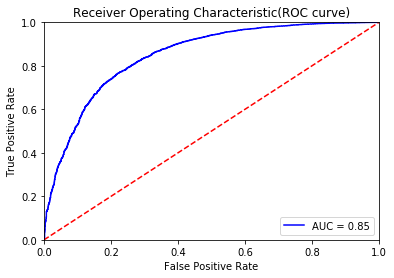

In [60]:
# calculate the fpr and tpr for all thresholds of the classification
probs = process_and_join_features.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic(ROC curve)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()